In [ ]:
! pip install kaggle

In [157]:
import os
import json
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Embedding , Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import spacy

In [42]:
nlp=spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [43]:
kagglejson=json.load(open('/content/kaggle.json'))

In [ ]:
os.environ['KAGGLE_USENAME']=kagglejson['username']
os.environ['KAGGLE_key']=kagglejson['key']

In [ ]:
! kaggle datasets download -d  lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [44]:
reviews=pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews.zip')

In [45]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [46]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
reviews.shape

(50000, 2)

In [47]:
reviews['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [48]:
reviews.isnull().sum()

,0
review,0
sentiment,0


**Text processing**

positive = 1

negative = 0

In [84]:
reviews['sentiment'].replace({"positive":1,"negative":0},inplace=True)

<ipython-input-84-6b3884a3d21d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reviews['sentiment'].replace({"positive":1,"negative":0},inplace=True)


In [82]:
X=reviews['review']
Y=reviews['sentiment']

In [55]:
max_words = 5000
max_len = 200

In [89]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
data = pad_sequences(sequences, maxlen=max_len)

In [95]:
X_train , X_test , Y_train , Y_test = train_test_split(data,Y,test_size=0.2,random_state=42,stratify=Y)

In [191]:
X_train.shape

(40000, 200)

In [192]:
X_test.shape

(10000, 200)

**Training Model**

In [76]:
model=Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [77]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [204]:
epochs = 5
batch_size = 5

In [205]:
History=model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 132s 16ms/step - accuracy: 0.9834 - loss: 0.0521 - val_accuracy: 0.8829 - val_loss: 0.4805
Epoch 2/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 148s 17ms/step - accuracy: 0.9856 - loss: 0.0440 - val_accuracy: 0.8829 - val_loss: 0.4785
Epoch 3/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 129s 16ms/step - accuracy: 0.9881 - loss: 0.0407 - val_accuracy: 0.8747 - val_loss: 0.6152
Epoch 4/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 151s 17ms/step - accuracy: 0.9896 - loss: 0.0374 - val_accuracy: 0.8831 - val_loss: 0.5015
Epoch 5/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 134s 16ms/step - accuracy: 0.9915 - loss: 0.0297 - val_accuracy: 0.8769 - val_loss: 0.4987


In [206]:
history=History.history
np.mean(history['accuracy'])

0.9852050065994262

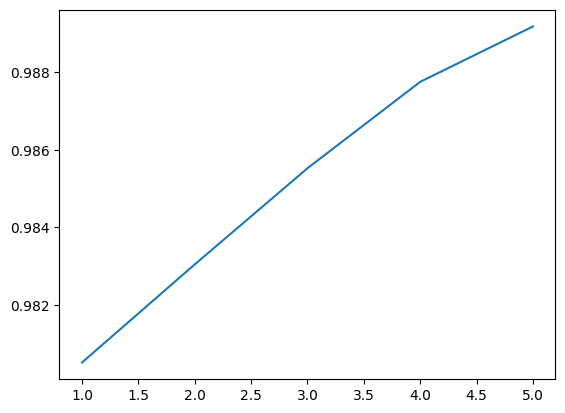

In [207]:
plt.plot(np.arange(1,epochs+1),history['accuracy'])

In [208]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8734 - loss: 0.5204
Loss: 0.49868008494377136
Accuracy: 0.8769000172615051


**Sentiment Analysis System**

In [209]:
predaction_values=predact_value= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Axes: >

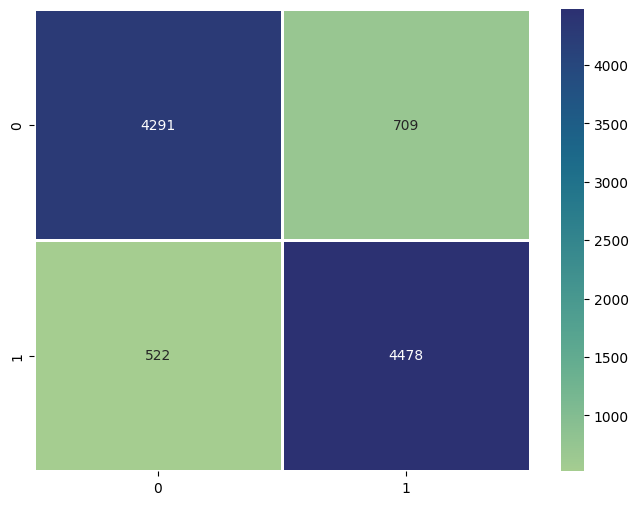

In [210]:
threshold=0.5
matrix=confusion_matrix(Y_test,np.where(predaction_values > threshold, 1,0))
plt.figure(figsize=(8,6))
sns.heatmap(matrix,cmap='crest',fmt="d",linewidths=1,annot=True)

In [211]:
text=['Fantastic customer service, I’m definitely coming back',' absolutely love this place; the atmosphere is amazing!',
      'The service was slow, and the food was cold','I had a terrible experience, wouldn’t recommend it to anyone']
texts_sequences =tokenizer.texts_to_sequences(text)
text = pad_sequences(texts_sequences, maxlen=max_len)
predact_value= model.predict(text)
for value in predact_value:
    print(f'{round(100*float(value))}% ~ positive') if value > threshold else print(f'{round(100-(100*float(value)))}% ~ Nagative')
    print('-'*20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
92% ~ positive
--------------------
100% ~ positive
--------------------
100% ~ Nagative
--------------------
98% ~ Nagative
--------------------


<ipython-input-211-336767dd7c37>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'{round(100*float(value))}% ~ positive') if value > threshold else print(f'{round(100-(100*float(value)))}% ~ Nagative')
